# Modeling - Clustering

In [1]:
from pydataset import data
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

In [64]:
iris = data('iris')
iris = iris.rename(columns = {'Sepal.Length':'sepal_length', 'Sepal.Width':'sepal_width', 'Petal.Length':'petal_length', 'Petal.Width':'petal_width'})

1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [3]:
X = iris[['petal_length', 'petal_width']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [5]:
iris['cluster'] = kmeans.predict(X)

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

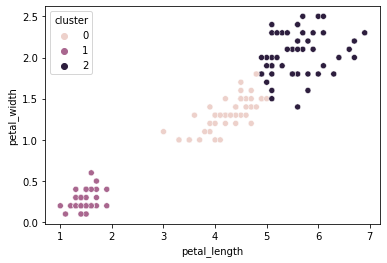

In [7]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

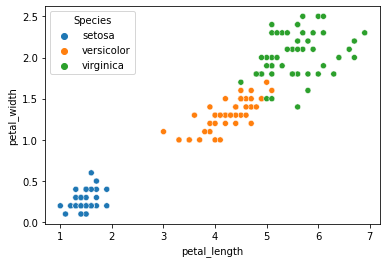

In [8]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='Species')

In [9]:
iris.groupby('Species').cluster.value_counts()

Species     cluster
setosa      1          50
versicolor  0          48
            2           2
virginica   2          46
            0           4
Name: cluster, dtype: int64

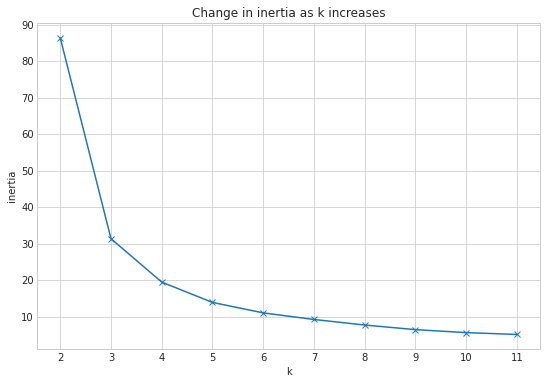

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

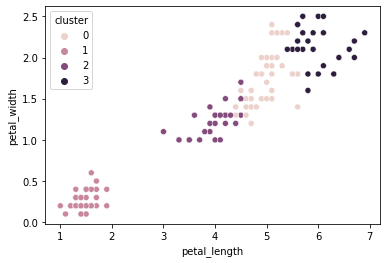

In [65]:
X = iris[['petal_length', 'petal_width', 'sepal_length']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

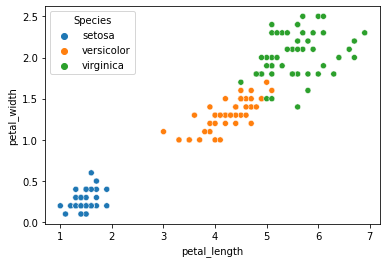

In [12]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='Species')

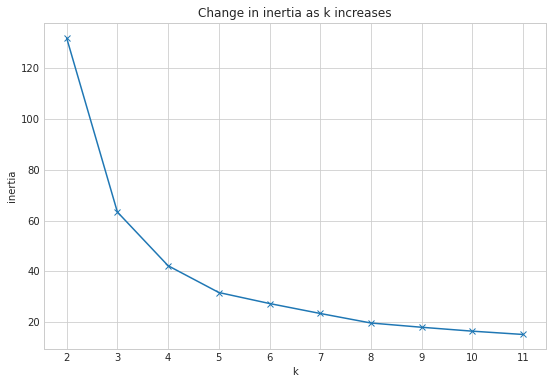

In [13]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [14]:
iris.groupby('Species').cluster.value_counts()

Species     cluster
setosa      1          50
versicolor  0          48
            2           2
virginica   2          36
            0          14
Name: cluster, dtype: int64

Looks like `petal_length` and `petal_width` are actually better.  But this is using clustering more like a classification algorithm, as I know the label of the data.

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [15]:
import wrangle_mall

mall = wrangle_mall.mall_data()

Returning saved csv file.


In [16]:
mall

,customer_id,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
0,1,1,0.019231,0.000000,0.387755
1,2,1,0.057692,0.000000,0.816327
2,3,0,0.038462,0.008197,0.051020
3,4,0,0.096154,0.008197,0.775510
4,5,0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,196,0,0.326923,0.860656,0.795918
196,197,0,0.519231,0.909836,0.275510
197,198,1,0.269231,0.909836,0.744898
198,199,1,0.269231,1.000000,0.173469


Try with two columnsL `spending_score` and `annual_income`

<AxesSubplot:xlabel='annual_income_scaled', ylabel='spending_score_scaled'>

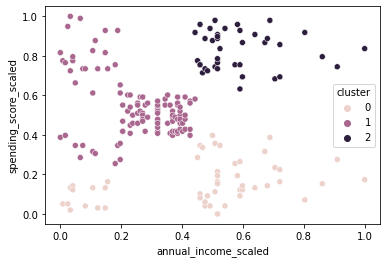

In [17]:
X = mall[['annual_income_scaled', 'spending_score_scaled']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
mall['cluster'] = kmeans.predict(X)
sns.scatterplot(data=mall, x='annual_income_scaled', y='spending_score_scaled', hue='cluster')

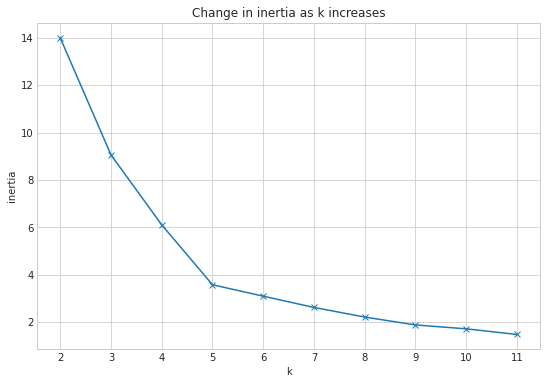

In [18]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

5 might actually be a better k

<AxesSubplot:xlabel='annual_income_scaled', ylabel='spending_score_scaled'>

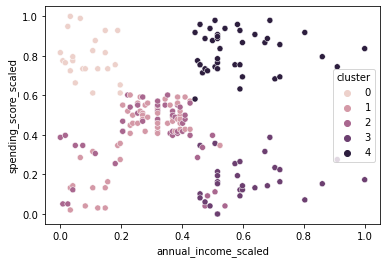

In [67]:
X = mall[['annual_income_scaled', 'spending_score_scaled', 'age_scaled']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
mall['cluster'] = kmeans.predict(X)
sns.scatterplot(data=mall, x='annual_income_scaled', y='spending_score_scaled', hue='cluster')

In [68]:
mall.groupby('cluster')[['age_scaled', 'annual_income_scaled', 'spending_score_scaled']].describe().T

cluster                              0          1          2          3  \
age_scaled            count  23.000000  58.000000  49.000000  30.000000   
                      mean    0.144649   0.722149   0.174254   0.500000   
                      std     0.101407   0.160095   0.138698   0.155413   
                      min     0.000000   0.461538   0.000000   0.269231   
                      25%     0.067308   0.596154   0.038462   0.365385   
                      50%     0.115385   0.682692   0.153846   0.490385   
                      75%     0.230769   0.879808   0.288462   0.572115   
                      max     0.326923   1.000000   0.423077   0.788462   
annual_income_scaled  count  23.000000  58.000000  49.000000  30.000000   
                      mean    0.092659   0.274449   0.303111   0.615847   
                      std     0.064703   0.113091   0.144691   0.138682   
                      min     0.000000   0.032787   0.000000   0.459016   
                      25%     0.036885   0.209016   0.221311   0.516393   
                      50%     0.081967   0.278689   0.344262   0.590164   
                      75%     0.147541   0.368852   0.401639   0.686475   
                      max     0.196721   0.524590   0.540984   1.000000   
spending_score_scaled count  23.000000  58.000000  49.000000  30.000000   
                      mean    0.791482   0.416080   0.408580   0.172789   
                      std     0.111773   0.159783   0.162252   0.100906   
                      min     0.612245   0.020408   0.040816   0.000000   
                      25%     0.734694   0.369898   0.346939   0.107143   
                      50%     0.775510   0.459184   0.418367   0.158163   
                      75%     0.852041   0.520408   0.540816   0.232143   
                      max     1.000000   0.602041   0.602041   0.387755   

cluster                              4  
age_scaled            count  40.000000  
                      mean    0.286058  
                      std     0.074185  
                      min     0.173077  
                      25%     0.230769  
                      50%     0.269231  
                      75%     0.346154  
                      max     0.423077  
annual_income_scaled  count  40.000000  
                      mean    0.582787  
                      std     0.133927  
                      min     0.442623  
                      25%     0.489754  
                      50%     0.520492  
                      75%     0.647541  
                      max     1.000000  
spending_score_scaled count  40.000000  
                      mean    0.821684  
                      std     0.102040  
                      min     0.581633  
                      25%     0.744898  
                      50%     0.836735  
                      75%     0.908163  
                      max     0.979592

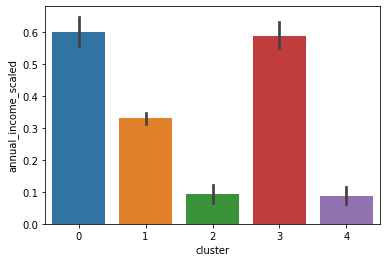

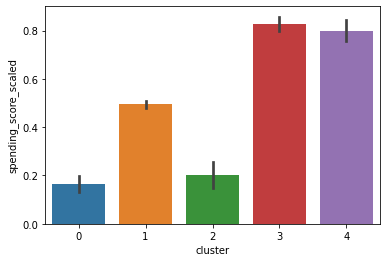

In [21]:
for col in ['annual_income_scaled', 'spending_score_scaled']:
    sns.barplot(data=mall, x='cluster', y=col)
    plt.show()

Hard to tell what it is clustering over.

3. How does scaling impact the results of clustering?

apply to unscaled data

In [22]:
mall_us = wrangle_mall.mall_unscaled()
mall_us

Returning saved csv file.


,customer_id,age,annual_income,spending_score,gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

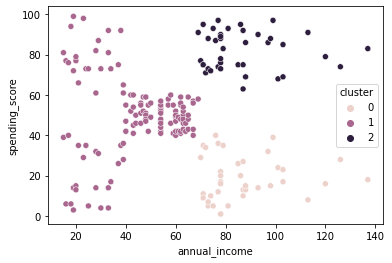

In [23]:
X = mall_us[['annual_income', 'spending_score']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
mall_us['cluster'] = kmeans.predict(X)
sns.scatterplot(data=mall_us, x='annual_income', y='spending_score', hue='cluster')

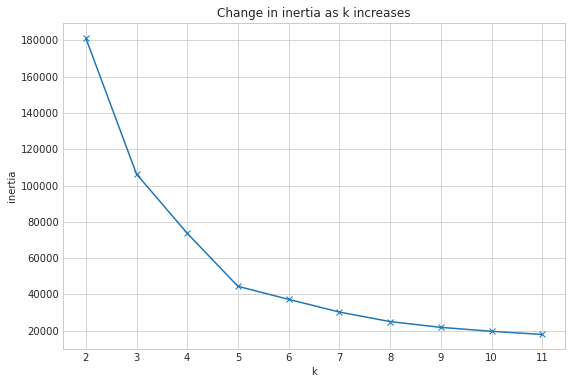

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

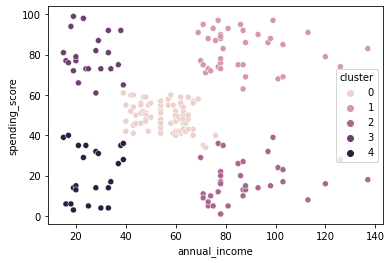

In [25]:
X = mall_us[['annual_income', 'spending_score']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
mall_us['cluster'] = kmeans.predict(X)
sns.scatterplot(data=mall_us, x='annual_income', y='spending_score', hue='cluster')

At least for this data, the clsutering does not look very different between scaled and unscaled data.  However, this could be an artifact of the numbers.  `annual_income` and `spending_score` have similar ranges/distributions.

In [27]:
mall_us[['annual_income', 'spending_score']].describe()

,annual_income,spending_score
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


Bonus

In [28]:
df = pd.read_csv('cluster_bonus.csv')
df

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804
...,...,...
795,3.941363,5.807617
796,6.057122,6.010463
797,8.373651,4.641515
798,-2.058756,6.077125


<AxesSubplot:xlabel='x', ylabel='y'>

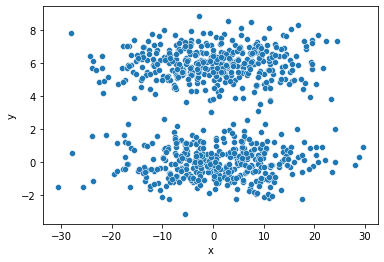

In [29]:
sns.scatterplot(data = df, x = 'x', y= 'y')

Looks like there are two clusters seperated by $y = 3$

In [30]:
df.describe()

,x,y
count,800.000000,800.000000
mean,0.508449,2.973206
std,9.906209,3.156376
min,-30.572062,-3.146259
25%,-6.068600,-0.047636
50%,0.581809,3.040642
75%,7.579269,5.996474
max,29.489457,8.817347


Consider the y values above and below 3

In [32]:
df['above_three'] = df.y >= 3
df.above_three.mean()

0.50125

about half are above three

In [35]:
df.groupby('above_three').describe()['y'].T

above_three,False,True
count,399.000000,401.000000
mean,-0.034656,5.966066
std,0.960791,0.988833
min,-3.146259,3.022682
25%,-0.662583,5.308249
50%,-0.055325,5.995493
75%,0.587760,6.618936
max,2.606816,8.817347


Considering the min and max, they line up false = [-3.14, 2.6] true = [3.02, 8.82]

apply kmeans on unscaled data

<AxesSubplot:xlabel='x', ylabel='y'>

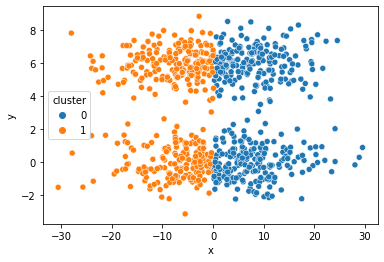

In [45]:
X = df[['y', 'x']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)
sns.scatterplot(data=df, x='x', y='y', hue='cluster')

It is splitting it on the x axis.  this is probably because of the scale.  the x values have a wider range than the y, even thought the y values are clearly grouped visually.  This mean that the distance between any two x values can be much greater than those between any two y values.

now try on scaled data, use minmaxscaler

In [52]:
df_scaled = wrangle_mall.mall_scale(df, ['x', 'y']).drop(columns=['cluster', 'above_three'])
df_scaled

,x_scaled,y_scaled
0,0.448379,0.273145
1,0.382135,0.414353
2,0.400701,0.268676
3,0.637730,0.311928
4,0.796779,0.291807
...,...,...
795,0.574635,0.748426
796,0.609861,0.765381
797,0.648430,0.650955
798,0.474735,0.770953


<AxesSubplot:xlabel='x_scaled', ylabel='y_scaled'>

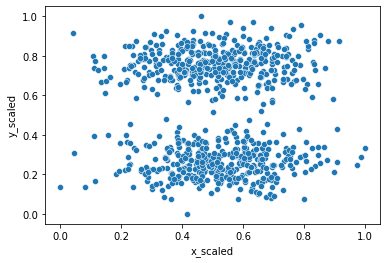

In [53]:
sns.scatterplot(data = df_scaled, x = 'x_scaled', y= 'y_scaled')

Note the change in the scales.  x and y have the same range

<AxesSubplot:xlabel='x_scaled', ylabel='y_scaled'>

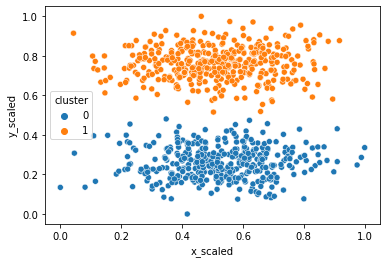

In [54]:
X = df_scaled[['y_scaled', 'x_scaled']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
df_scaled['cluster'] = kmeans.predict(X)
sns.scatterplot(data=df_scaled, x='x_scaled', y='y_scaled', hue='cluster')

Now it is splitting along $y = 3$.  Note that is seems, outside of an actual context, that either clustering the scaled or unscaled data is not meaningful.  Visually there appears to be a cluster, but mathematically there isn't *necesarily*  anything meaningful there absent some function. I might only want to consider a function that has a domain of positive values, in which case the unscaled clusters make more sense.

In [56]:
df['diff'] = abs(df['y'] - df['x'])
df[['diff']].describe()

,diff
count,800.000000
mean,8.619910
std,6.437149
min,0.019914
25%,3.565501
50%,7.142931
75%,12.279881
max,35.772790


In [58]:
df[['x', 'y']].describe()

,x,y
count,800.000000,800.000000
mean,0.508449,2.973206
std,9.906209,3.156376
min,-30.572062,-3.146259
25%,-6.068600,-0.047636
50%,0.581809,3.040642
75%,7.579269,5.996474
max,29.489457,8.817347


array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

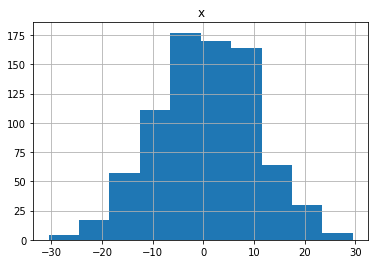

In [60]:
df[['x']].hist()

array([[<AxesSubplot:title={'center':'y'}>]], dtype=object)

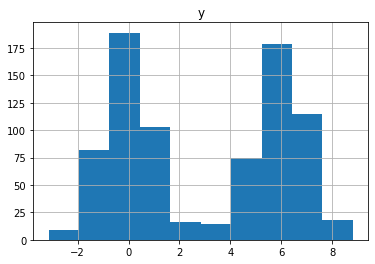

In [61]:
df[['y']].hist()

<AxesSubplot:>

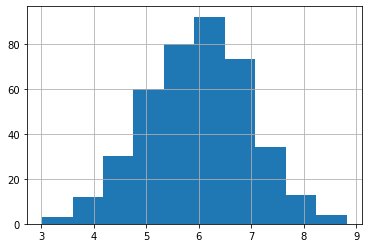

In [62]:
df[df['above_three']]['y'].hist()

<AxesSubplot:>

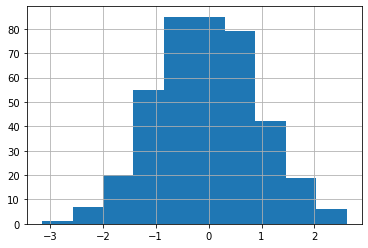

In [63]:
df[~df['above_three']]['y'].hist()